# DATA PREPROCESSING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
data.shape

(307511, 122)

### Checking for null and Duplicates

In [5]:
pd.set_option("display.max_rows", None) 

In [6]:
display(round((data.isnull().sum()*100)/len(data),2).sort_values(ascending=False))

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

##### From the above information, it can be seen there are too many columns with more than 50% of null values. Hence selecting the columns with more than 50% nulls, and dropping them.

In [7]:
null_cols = round((data.isnull().sum()*100)/len(data),2)
null_cols = null_cols[null_cols.values > 50.0]

In [8]:
len(list(null_cols.index))  #Finding the number of columns with more than 505 nulls values

41

There are 41 columns with more than 50% nulls.

In [9]:
data.drop(columns=null_cols.index,axis=1,inplace=True) #dropping those columns

In [10]:
data.shape  # Shape of the dataframe after droppingthe null columns

(307511, 81)

### Checking columns with more than 15 % nulls

In [11]:
other_cols = round(data.isnull().sum()*100/len(data),2)
other_cols = other_cols[other_cols.values > 15]
other_cols = list(other_cols.index)

In [12]:
other_cols

['OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE']

In [13]:
other_cols.remove('OCCUPATION_TYPE')  #dropping thwe object columns to plot heatmap
other_cols.remove('EMERGENCYSTATE_MODE')
other_cols.append('EXT_SOURCE_2')

### Checking the importance of these columns

<Axes: >

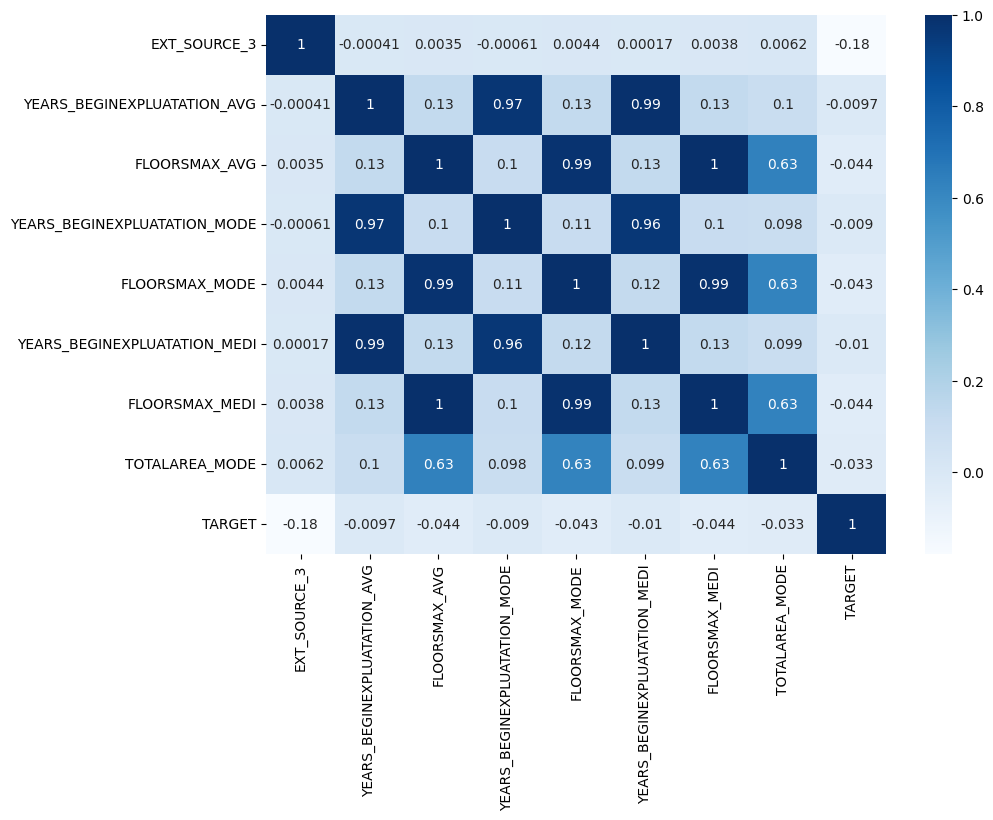

In [14]:
plt.figure(figsize= [10,7])

sns.heatmap(data[other_cols +['TARGET']].corr(), cmap="Blues",annot=True)

From the above plot, it is clear that none of the columns have any strong correlation with the Traget. Hence dropping the columns

In [15]:
data.drop(columns=other_cols +['EMERGENCYSTATE_MODE'],axis=1,inplace=True)

In [16]:
data.shape

(307511, 72)

### Imputing the columns with mode and median values

In [17]:
impute_col = data.isnull().sum()
impute_col = impute_col[impute_col.values>0]
display(impute_col)

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [18]:
impute_col.drop('OCCUPATION_TYPE',inplace=True)

In [19]:
for i in impute_col.index:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].median(), inplace=True)

In [20]:
pd.set_option("display.max_rows", None) 
display(data.isnull().sum().sort_values(ascending=False))

OCCUPATION_TYPE                96391
REG_CITY_NOT_WORK_CITY             0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_2                    0
SK_ID_CURR                         0
DAYS_LAST_PHONE_CHANGE             0
DEF_60_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_30_CNT_SOCIAL_CIRCLE           0
OBS_30_CNT_SOCIAL_CIRCLE           0
EXT_SOURCE_2                       0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_20                   0
AMT_REQ_CREDIT_BUREAU_QRT          0
AMT_REQ_CREDIT_BUREAU_MON          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_HOUR         0
FLAG_DOCUMENT_21                   0
F

### Imputing the occupation nulls with Unknown as a new category

In [24]:
data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [21]:
data["OCCUPATION_TYPE"] = data["OCCUPATION_TYPE"].fillna("Unknown") 

In [22]:
data.duplicated().sum()   #There are no duplicates in the dataset

0

# Fixing the negative values

In [25]:
display(data.describe())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


The days columns have some negative values which is impossible. 

In [26]:
day_columns = []
for i in data:
    if i.startswith('DAYS'):
        day_columns.append(i)
day_columns

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

##### Selecting all the Days columns and converting it to positive values

In [40]:
#Calculating the number of negative values in the day columns
import numpy as np
col = {'col_name' : [], 'sum' : []}
for i in day_columns:
    col['col_name'].append(i)
    col['sum'].append(np.sum((data[i] < 0).values.ravel()))
pd.DataFrame(col)

,col_name,sum
0,DAYS_BIRTH,307511
1,DAYS_EMPLOYED,252135
2,DAYS_REGISTRATION,307431
3,DAYS_ID_PUBLISH,307495
4,DAYS_LAST_PHONE_CHANGE,269839


Almost all the values in the columns are negative values, hence converting them to absolute values

In [41]:
for i in day_columns:
    data[i] = abs(data[i])

### Analyzing the flag columns

In [42]:
flag_columns = []
for i in data:
    if i.startswith('FLAG'):
        flag_columns.append(i)
flag_columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

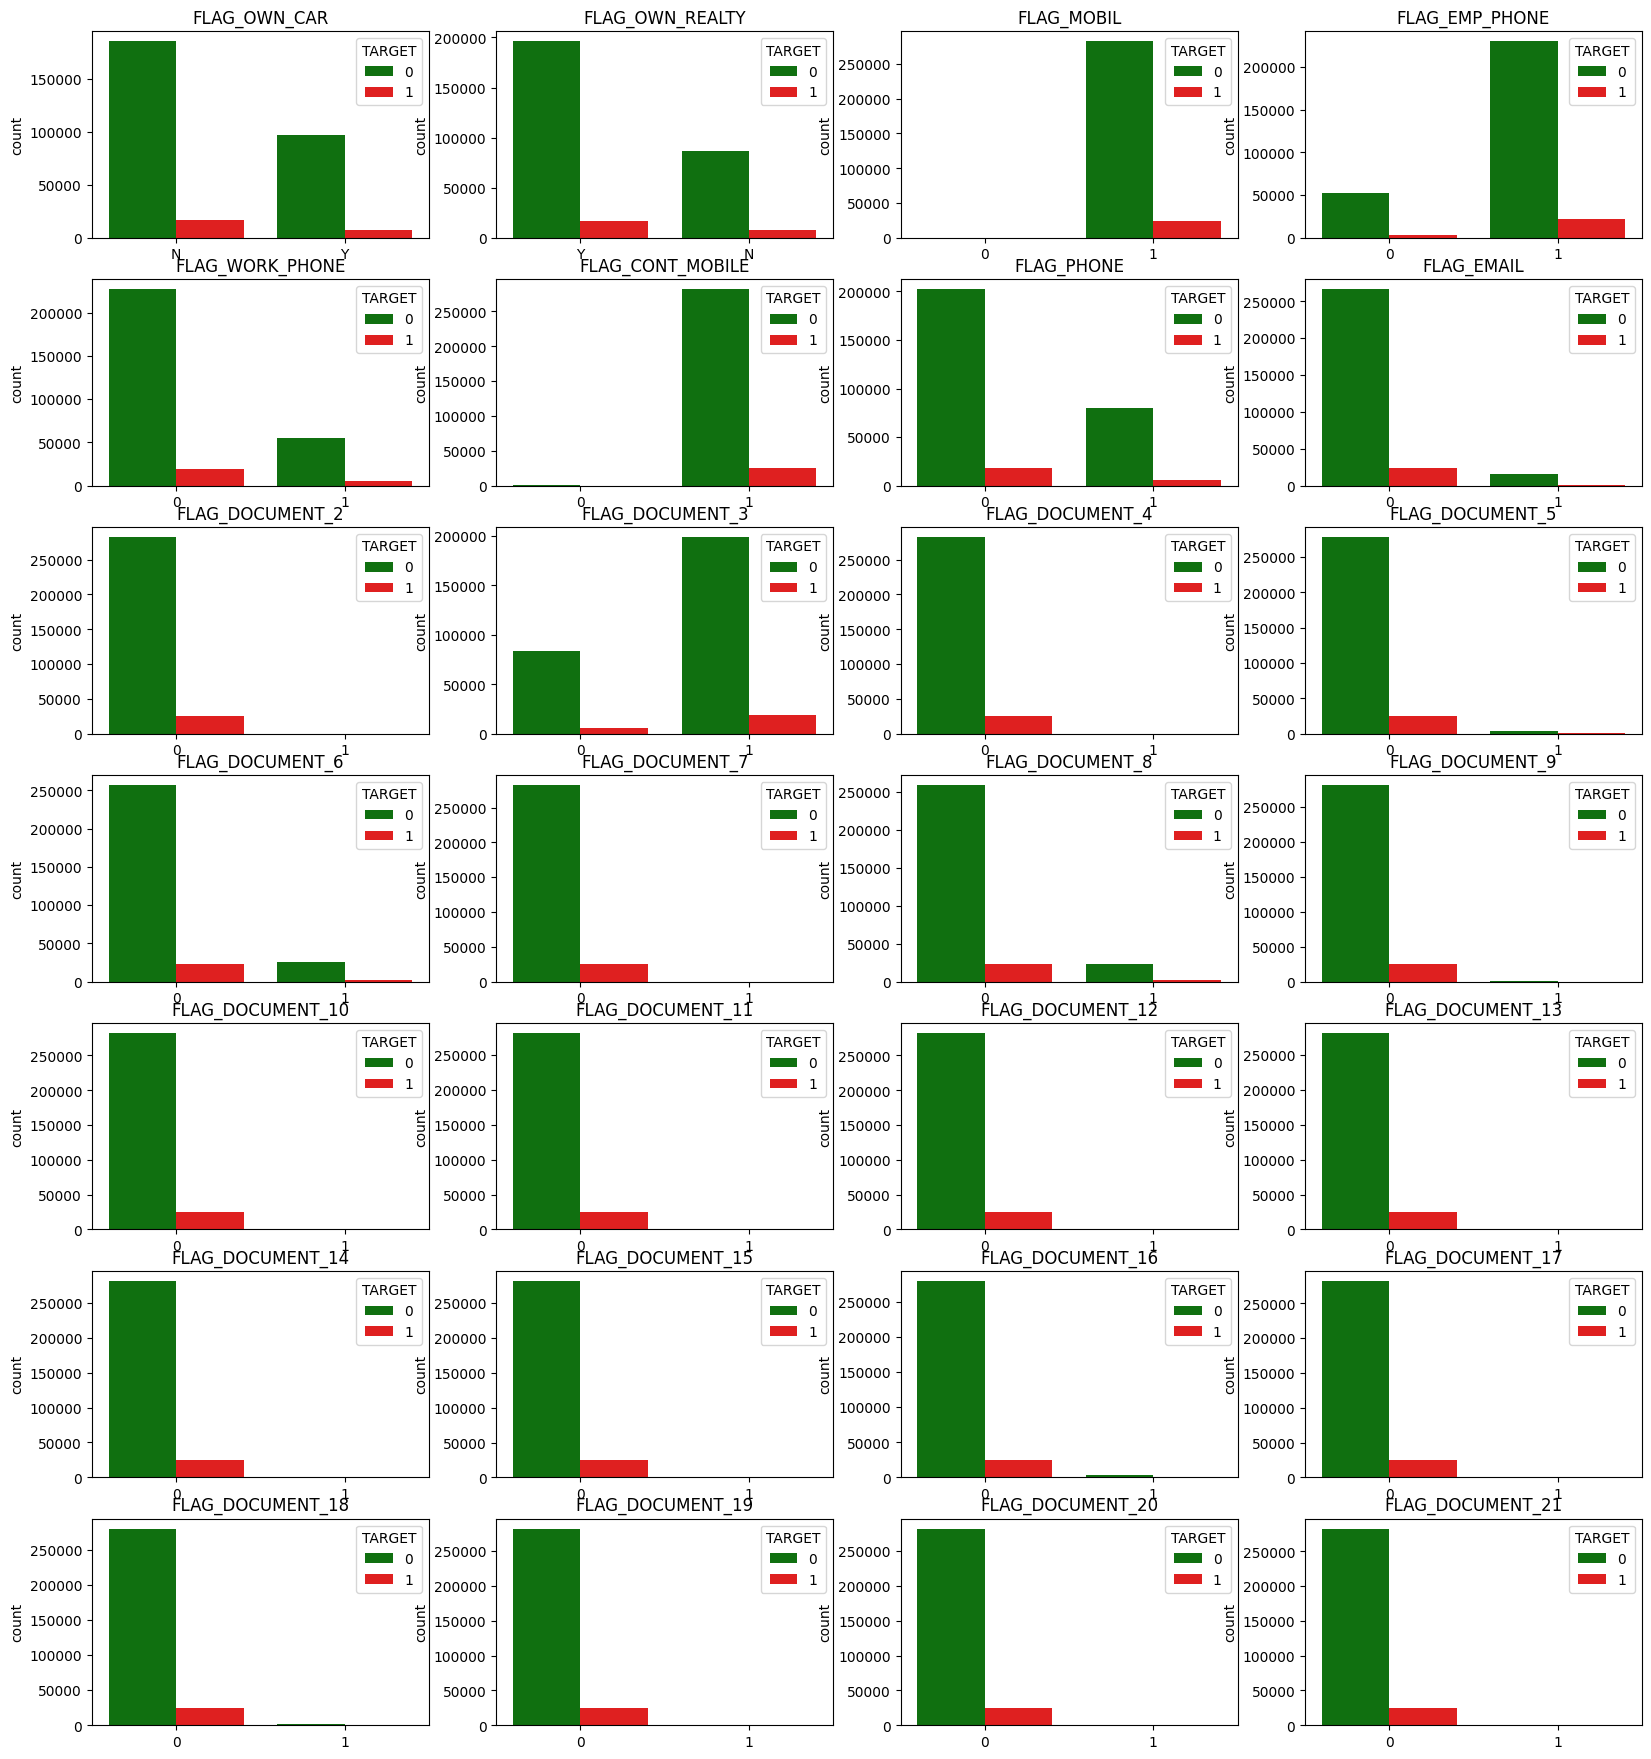

In [47]:
plt.figure(figsize = [20,22])

for i,j in zip(flag_columns,range(len(flag_columns))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(data=data,x = i, hue = "TARGET", palette = ["g","r"])
    plt.xlabel('')
    plt.title(i)

#### In the Target column, 0 - People who repay the loan and 1 - people who fail to pay
* All the flag columns have more number of repayers than the defaulters.
* And except for flag_doc_3 , all other document are not owned by repayers or defaulters. Hence these columns can be dropped too.
* The data shows every person has a mobile, and most of them do not own an EMAIL.Thus these columns wont have an impact in target.Thus dropping these columns too.

In [48]:
drop_cols = ['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [49]:
data.drop(drop_cols,axis=1,inplace=True)

In [50]:
data.shape

(307511, 47)

# Analyzing the Object columns

In [51]:
obj = data.select_dtypes(include='object').columns

In [52]:
obj

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [53]:
for col in list(obj):
    print("Column Name:",col,"\n",data[col].value_counts())
    print("\n")

Column Name: NAME_CONTRACT_TYPE 
 NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


Column Name: CODE_GENDER 
 CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


Column Name: FLAG_OWN_CAR 
 FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


Column Name: FLAG_OWN_REALTY 
 FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


Column Name: NAME_TYPE_SUITE 
 NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64


Column Name: NAME_INCOME_TYPE 
 NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count,

The columns CODE_GENDER,ORGANIZATION_TYPE have XNA, which are nulls. Hence replace those nulls with mode values

In [55]:
data['CODE_GENDER']= data['CODE_GENDER'].replace('XNA','F')

#### Checking the occupation type and incometype for the null values in oraganization type columns

In [67]:
data[data['ORGANIZATION_TYPE']=='XNA'][['ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']].head(150)

,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE
8,XNA,Unknown,Pensioner
11,XNA,Unknown,Pensioner
23,XNA,Unknown,Pensioner
38,XNA,Unknown,Pensioner
43,XNA,Unknown,Pensioner
46,XNA,Unknown,Pensioner
54,XNA,Unknown,Pensioner
56,XNA,Unknown,Pensioner
62,XNA,Unknown,Pensioner
79,XNA,Unknown,Pensioner


After thoroughly checking these columns, it is clear that Income type for XNA is Pensioner.Thus replacing both unkown and xna to pensioner 

In [69]:
data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].replace('XNA','Pensioner')
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].replace('Unknown','Pensioner')

### Analyzing the Amount columns

<Axes: >

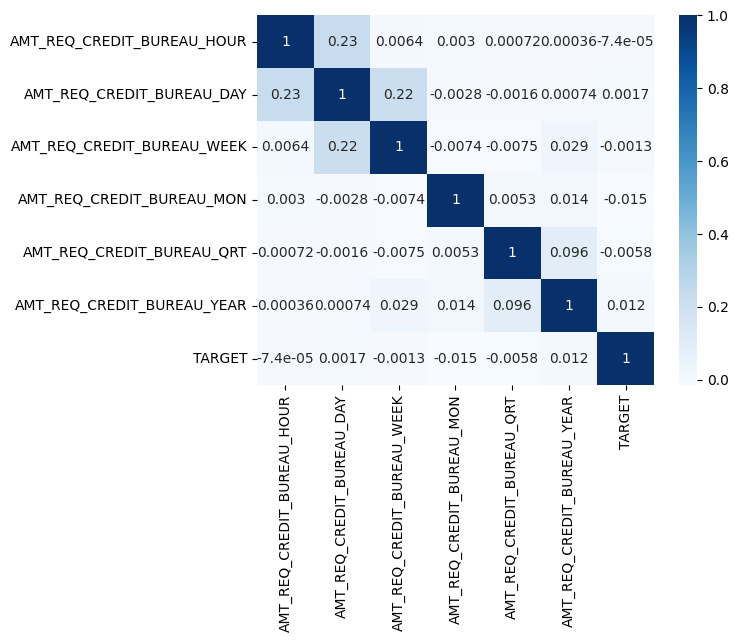

In [225]:
amt_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
sns.heatmap(data[amt_cols+['TARGET']].corr(),annot = True,cmap='Blues')

None of the columns are linearly correlated to target column. Hence simply dropping those columns

In [226]:
data.drop(amt_cols,axis=1,inplace=True)

# Analyzing the Numerical columns

In [227]:
data.select_dtypes(exclude='object').dtypes

SK_ID_CURR                       int64
TARGET                           int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int32
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                  int32
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
OBS_30_CNT_SOCIAL_CIRCLE         int32
DEF_30_CNT_SOCIAL_CIRCLE         int32
OBS_60_CNT_SOCIAL_CIRCLE         int32
DEF_60_CNT_SOCIAL_CIRCLE 

#### Converting the data types of the columns which cannot be float to int

In [228]:
float_cols = ['DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS']

for col in float_cols:
    data[col] = data[col].astype('int')

# Outlier Detection

In [250]:
df1 = data.copy()

##### Selecting the numerical columns

In [251]:
df1.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_3'],
      dtype='object')

* From the above columns, selecting only the continous numerical columns and excluding the categorical columns for boxplotting 

In [252]:
num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','HOUR_APPR_PROCESS_START','DAYS_LAST_PHONE_CHANGE']
len(num_cols)

9

## Boxplots of Numerical columns

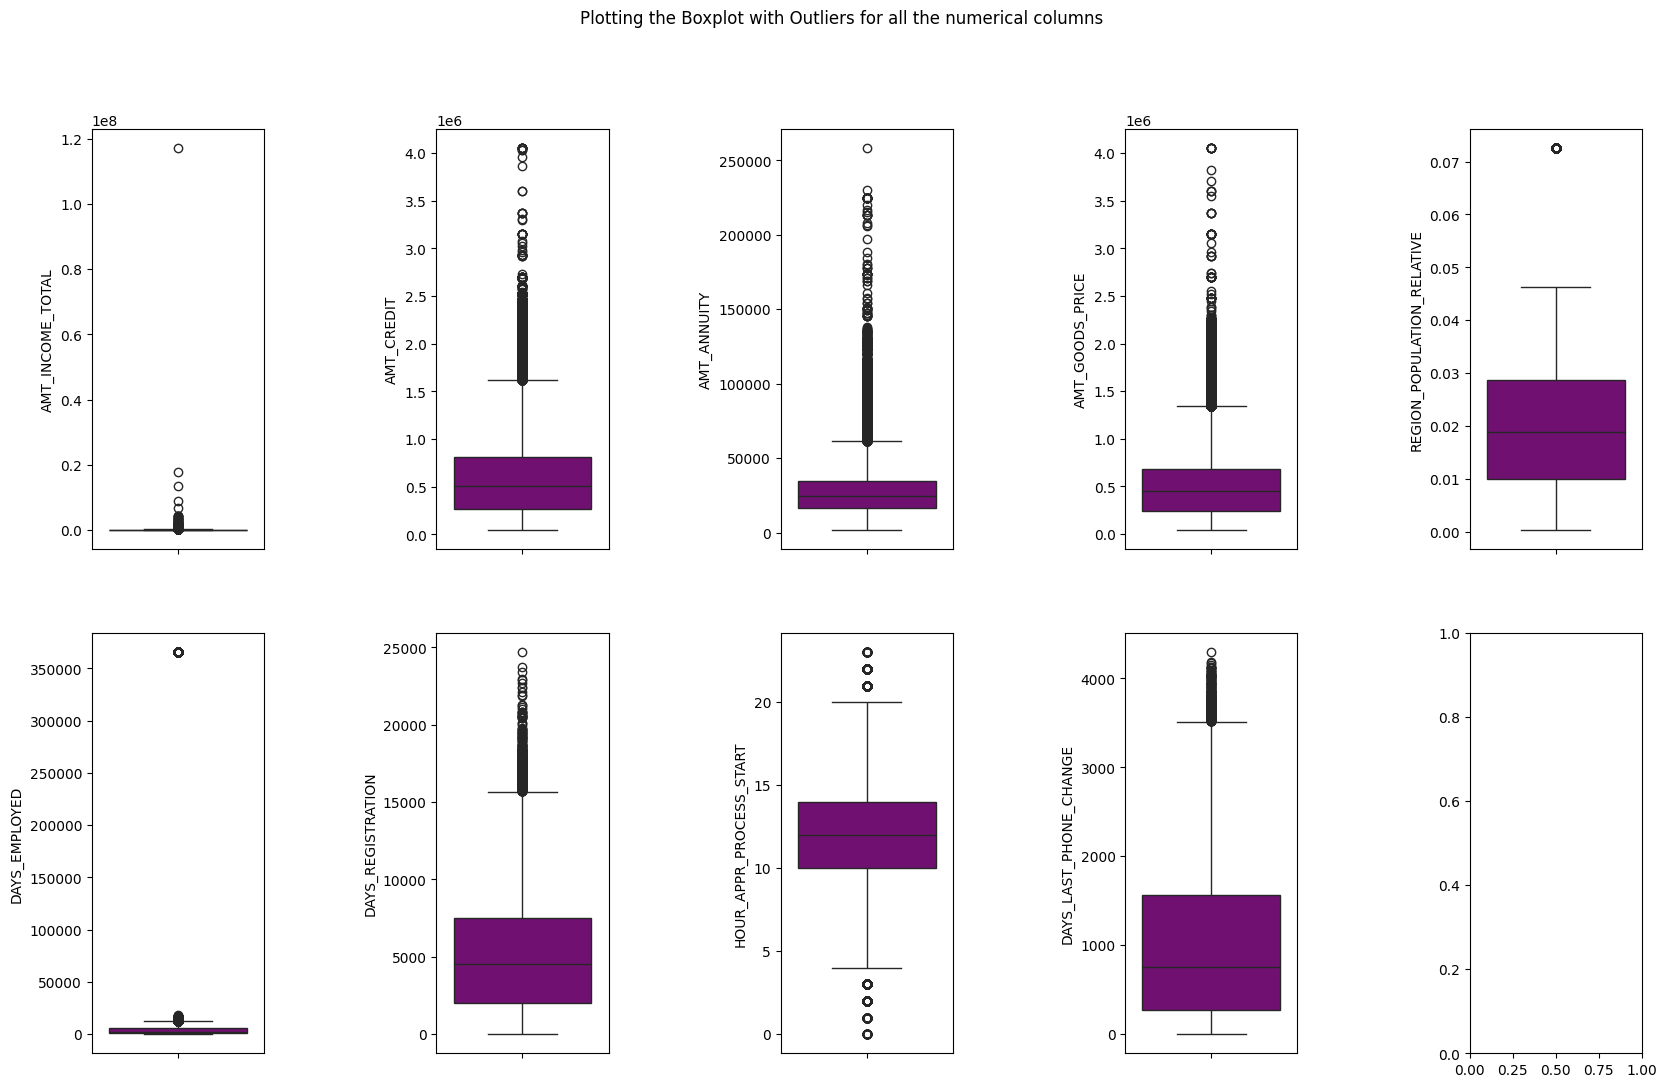

In [253]:
# initialize figure with 10 subplots in 2 rows
fig, axes = plt.subplots(2, 5,figsize=(20,12))
fig.suptitle('Plotting the Boxplot with Outliers for all the numerical columns')
# add padding between the subplots
plt.subplots_adjust(wspace=1) 

# draw boxplot for each column in the each subplot
for i,val in zip(axes.flatten(),num_cols):
        sns.boxplot(data=df1[val], ax=i,color = 'purple')
        ax.set_xlabel(val)

### Outlier Treatment with IQR method

In [254]:
for column in num_cols:
    # IQR Detection
    # Calculate the upper and lower limits
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df1[column] = df1[column].clip(lower, upper)

### After Outlier Treatment

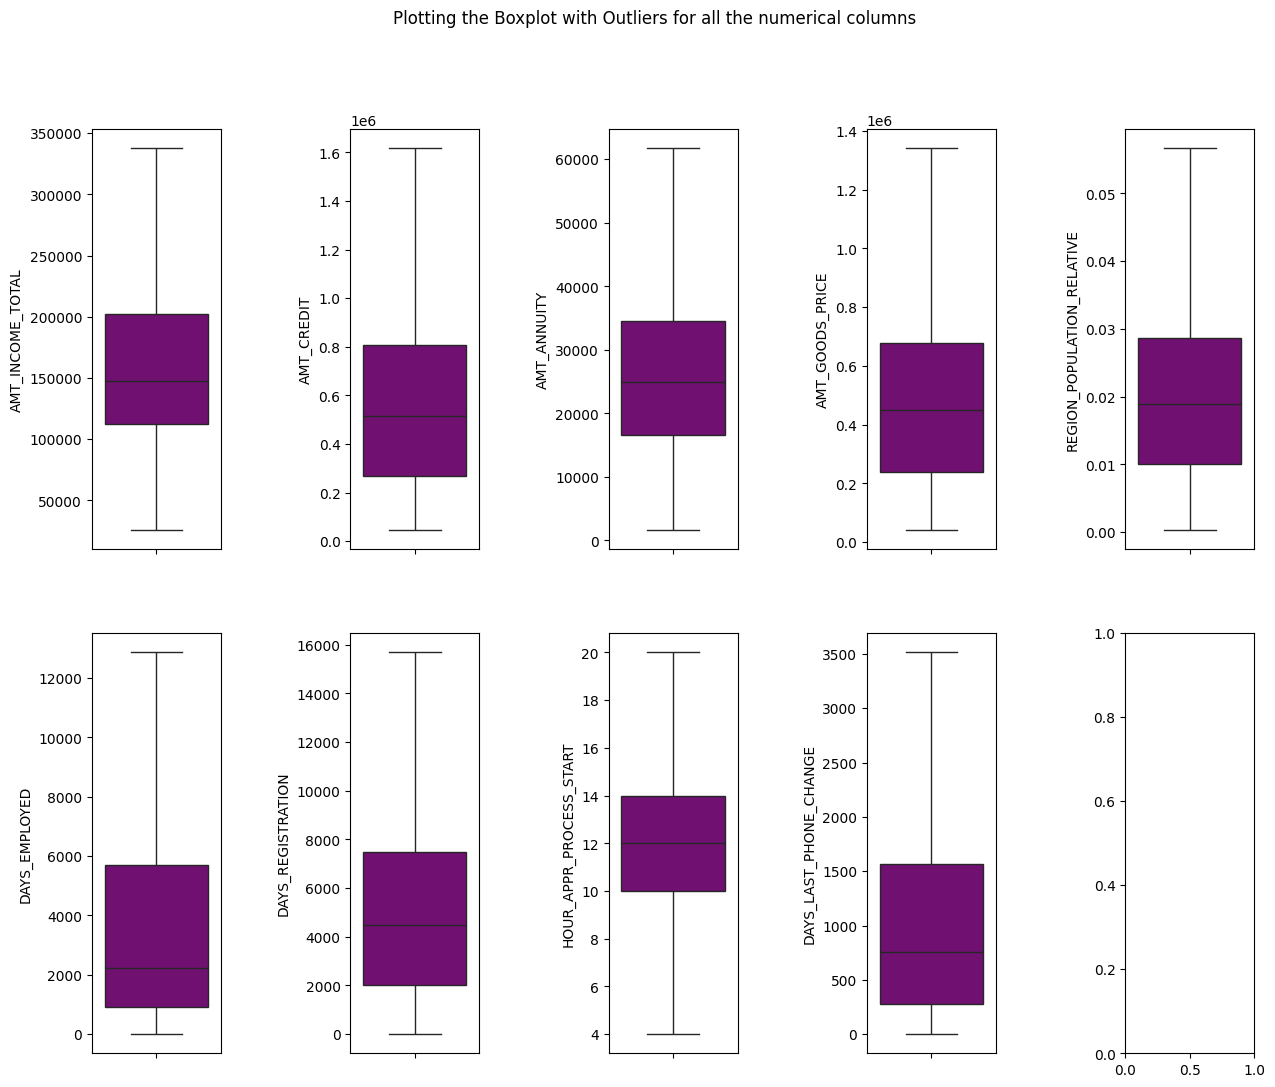

In [257]:
# initialize figure with 10 subplots in 2 rows
fig, axes = plt.subplots(2, 5,figsize=(15, 12))
fig.suptitle('Plotting the Boxplot with Outliers for all the numerical columns')
# add padding between the subplots
plt.subplots_adjust(wspace=1) 

# draw boxplot for each column in the each subplot
for i,val in zip(axes.flatten(),num_cols):
        sns.boxplot(data=df1[val], ax=i,color = 'purple')
        ax.set_xlabel(val)

In [265]:
df1 = df1[df1['CNT_CHILDREN'] < 7]

In [266]:
df1.to_csv('app_data_eda.csv',index=False)